# Preamble

Title: *Diabetes Data Analysis - Decision Tree Learning*

Author: *Dakota M. Miller*

Email: *dmil166 @ msudenver.edu*

Last Update: *2021-10-17*


# Introduction

The goal of this notebook is to analyze the accuracy of sci-kit learn Decision Tree as it applies to classification of diabetes factors and outcomes.

# Dataset

The dataset for this report consists of a collection of 8 attributes and the outcome from 769 observations countries. This analysis uses all eight attributes to reach conclusions and test accuracy.

Sample of the diabetes data used:
```
[
pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,target
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
…
…
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0
]
```

### Library Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

### Definitions/Parameters

In [3]:
import os
os.chdir(globals()['_dh'][0])
os.chdir('../')
DATA_FOLDER = os.path.join(os.getcwd(), 'data')
CSV_FILE_NAME = 'diabetes.csv'
CSV_FILE_PATH = os.path.join(DATA_FOLDER, CSV_FILE_NAME)

### Resources
Utilized the following with printing a SKLearn Decision Tree

* https://scikit-learn.org/stable/modules/tree.html

* https://mljar.com/blog/visualize-decision-tree/

* https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/

Confirmed how to add points to a matplotlib plot

* https://stackoverflow.com/questions/44813601/how-to-set-x-axis-values-in-matplotlib-python

CS390Z - Introduction to Data Mining - Fall 2021

Student: Dakota M. Miller

Description: Decision Tree Analysis

run: 10
training...
|--- bmi <= 29.85
|   |--- age <= 46.00
|   |   |--- glucose <= 134.50
|   |   |   |--- class: 0.0
|   |   |--- glucose >  134.50
|   |   |   |--- bp <= 59.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- bp >  59.00
|   |   |   |   |--- class: 0.0
|   |--- age >  46.00
|   |   |--- age <= 53.50
|   |   |   |--- class: 1.0
|   |   |--- age >  53.50
|   |   |   |--- bp <= 75.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- bp >  75.00
|   |   |   |   |--- class: 0.0
|--- bmi >  29.85
|   |--- glucose <= 111.00
|   |   |--- glucose <= 91.50
|   |   |   |--- class: 1.0
|   |   |--- glucose >  91.50
|   |   |   |--- class: 0.0
|   |--- glucose >  111.00
|   |   |--- pregnant <= 5.50
|   |   |   |--- bp <= 78.00
|   |   |   |   |--- glucose <= 112.50
|   |   |   |   |   |--- bp <= 69.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- bp >  69.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- glucose >  112.50
|   |   |   |   |   |--- 

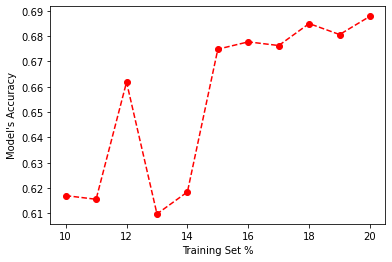

In [4]:
if __name__ == "__main__":

    df = pd.read_csv(CSV_FILE_PATH)
    runs = [x for x in range(10, 21)]
    accuracies = []

    for run in runs:
        print('run:', run)

        # TODO: split the dataset into training and test dataset
        # make sure you select data rows randomly and without repetition
        random.seed(8675309)
        rows_train = random.sample(range(len(df)), k=int(len(df) * .1))
        training_data = pd.DataFrame(columns=df.columns)
        test_data = pd.DataFrame(columns=df.columns)
        for i, row in df.iterrows():
            if i in rows_train:
                training_data = training_data.append(row)
            else:
                test_data = test_data.append(row)

        # TODO: train a decision tree model (you can use the id3 function or scikit learn)
        print('training...')
        X = training_data.iloc[:, 0:-1].values
        Y = training_data.iloc[:, -1].values
        model = DecisionTreeClassifier().fit(X, Y)

        # TODO: (optional) print the obtained decision tree
        print(export_text(model, feature_names=list(training_data.columns[:-1])))

        # TODO: compute the accuracy of the obtained model using the test dataset
        correct = 0.0
        for _, row in test_data.iterrows():
            value_predict = model.predict([row[:-1].values])
            if value_predict == row['target']:
                correct += 1.0
        denom = len(test_data.index)
        print('accuracy:', correct / denom)
        accuracies.append(correct / len(test_data.index))

    # TODO: plot learning curve

    plt.xlabel('Training Set %')
    plt.ylabel('Model\'s Accuracy')
    plt.plot(runs, accuracies, marker='o', linestyle='--', color='r',
             label='Square')
    plt.show()